In [1]:
import pandas as pd
import re
import aacdata
import numpy as np
import matplotlib.pyplot as plt
import warnings

# parse_gender (use regex to see if Male or Female is in the string and return that, ele return string)
# find_duplicate_animals(df)
# remove_duplicate_animals(df)

# 107,050 Aniaml IDs but only 95,962 unique. Means dupes.
# 5 intake tpyes with Stray being top
# 8 intake conditions with Normal being top
# 5 animal types with Dog being type
# 49 different animal ages with 1 year being top

In [2]:
# Import cleaned data
df_intake = pd.read_csv('df_intake.csv')
df_outcome = pd.read_csv('df_outcome.csv')
df_combined = pd.read_csv('df_combined.csv')
df_combined_nodup = aacdata.remove_duplicate_animals(df_combined)

In [3]:
# Find the unique number of dog breeds in the combined data. Only looking at the top x number of value counts.
# This will dynamically update to top number of dog breeds analyzed and update the charts.
i = 5

print(f"Number of Unique Breeds (Combined): " + str(len(df_combined[df_combined['Animal Type'] == 'Dog']['Breed'].unique())))
top_percent = round(df_combined[df_combined['Animal Type'] == 'Dog']['Breed'].value_counts(1).head(i).sum(),2)*100
print(f"Percent of Total of Top {i} Breeds (Combined): " + str(top_percent) + "%")

Number of Unique Breeds (Combined): 2166
Percent of Total of Top 5 Breeds (Combined): 41.0%


In [4]:
# Remove "Mix" from Breed Names. Duplicates Removed.

stop_words = ["Mix"]
f = lambda x: ' '.join(w for w in x.split() if not w in stop_words)

df_combined_nodup['Breed'] = df_combined_nodup['Breed'].apply(f)

print(f"Number of Unique Breeds (Combined, Cleaned, No Duplicates): " + str(len(df_combined_nodup[df_combined_nodup['Animal Type'] == 'Dog']['Breed'].unique())))
top_percent_nodup = round(df_combined_nodup[df_combined_nodup['Animal Type'] == 'Dog']['Breed'].value_counts(1).head(i).sum(),2)*100
print(f"Percent of Total of Top {i} Breeds (Combined, Cleaned, No Duplicates): " + str(top_percent_nodup) + "%")

Number of Unique Breeds (Combined, Cleaned, No Duplicates): 1851
Percent of Total of Top 5 Breeds (Combined, Cleaned, No Duplicates): 43.0%


### Top 5 Dog Breeds Brought to Center

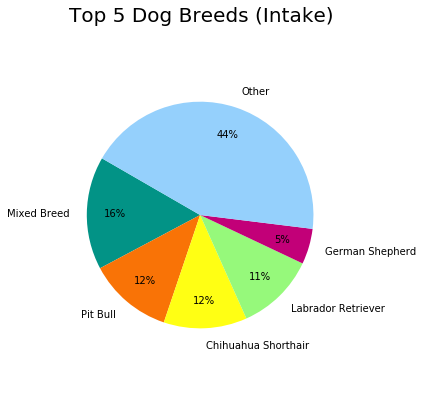

In [5]:
# Narrow dataframe to just dogs
dog_combined_nodup = df_combined_nodup.loc[df_combined_nodup['Animal Type'] == 'Dog']

# Parse dogs misted as mixed breeds into one category
def parse_breed(s):
    if bool(re.search('/', s)):
        return 'Mixed Breed'
    else:
        return s

dog_top_parse = dog_combined_nodup['Breed'].apply(parse_breed).value_counts().head(i)
dog_total = len(dog_combined_nodup)
other_dogs = dog_total - dog_top_parse.sum()
other_dogs = pd.Series([other_dogs], index=['Other'])

dog_total_series = dog_top_parse.append(other_dogs)

# Plot the Pie Chart
color = ['xkcd:teal', 'xkcd:orange', 'xkcd:yellow','xkcd:light green', 'xkcd:magenta', 'xkcd:light blue']
fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111)
ax.pie(dog_total_series.values, labels=dog_total_series.index, colors=color, autopct='%1.0f%%', labeldistance=1.15, pctdistance=0.75, startangle=150)
ax.set_title(f"Top {i} Dog Breeds (Intake)", fontsize=20);
plt.axis('equal')
# plt.figtext(0, 0, '*Include a description of other here.', style='italic') 
plt.tight_layout()
plt.savefig("Images/Top_5_Dog_Breeds.png")

### Does breed have any correlation to intake reason, adoption rate, or animals that have been returned more than once?

#### Intake Reason Analysis

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


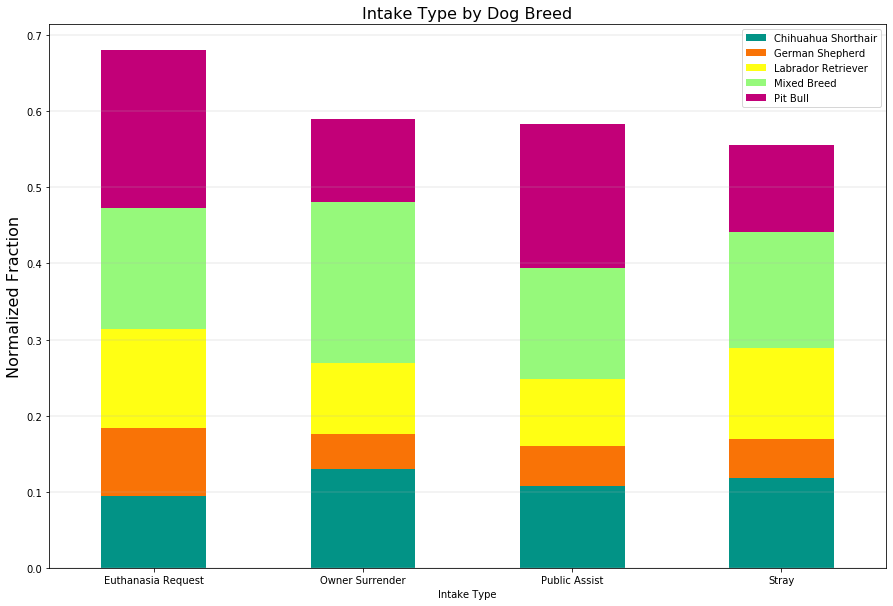

In [6]:
## Intake Type
# Stray                 33231
# Owner Surrender        6896
# Public Assist          3691
# Euthanasia Request      169
# Name: Intake Type, dtype: int64

dog_combined_nodup['Dog Breed'] = dog_combined_nodup['Breed'].apply(parse_breed)
dog_stray = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Stray'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
# dog_stray = dog_stray.iloc[0:i]
# dog_stray_r = dog_stray.sum()
# dog_stray_total
dog_stray

dog_sur = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Owner Surrender'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
dog_sur = dog_sur.iloc[0:i]
dog_sur

dog_pub = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Public Assist'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
dog_pub = dog_pub.iloc[0:i]
dog_pub

dog_euth = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Euthanasia Request'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
dog_euth = dog_euth.iloc[0:i]
dog_euth

intake_type = dog_stray.append(dog_sur).append(dog_pub).append(dog_euth).unstack()
intake_type

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

intake_type.plot.bar(stacked=True, ax=ax, color=color);
plt.xticks(rotation=0)
ax.set_title('Intake Type by Dog Breed', fontsize=16)

ax.set_ylabel('Normalized Fraction', fontsize=16)
ax.yaxis.grid(which='major', linewidth=0.3)

ax.legend(loc='upper right')
plt.savefig("Images/Intake_Type_by_Dog_Breed.png")
plt.show()



#### Euthanasia Analysis

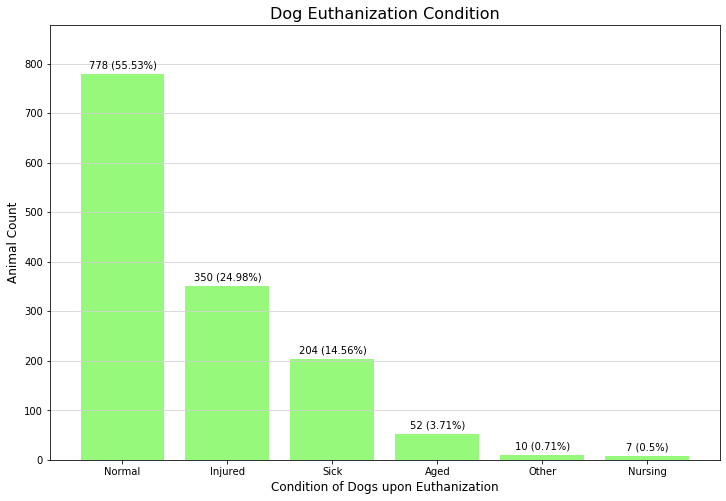

In [66]:
# Austin is a no kill shelter, why are there so many euthanasia requests
# intake health vs outcome for euthenasia
# pie chart for dog outcomes
# % of the "normal" what is the breed breakdown

# get euthanasia outcome counts by condition
comb_dog = df_combined_nodup[(df_combined_nodup['Animal Type'] == 'Dog')]
comb_dog['Outcome Type'].value_counts()
euth_outcomes = comb_dog[comb_dog['Outcome Type']  == 'Euthanasia']['Intake Condition'].value_counts()

# let's plot
fig, ax = plt.subplots(figsize=(12,8))

x_axis = np.arange(len(euth_outcomes))
# Create a bar chart based upon the above data
plt.bar(x_axis, euth_outcomes, color=color[3])
# can just send in x axis since it has the vlaues of axis already to be updated
plt.xticks(x_axis, euth_outcomes.index)

euth_total_outcomes = euth_outcomes.sum()

index = 0
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    pct = ' (' + str(round(h/euth_total_outcomes * 100, 2)) + '%)'
    amt = format(p.get_height(), ',.0f')
#     print(amt + pct)
    if h != 0:   
        ax.annotate(amt+pct, xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    index += 1
        
# reset max y axis so we can get the values printed inside the chart
plt.ylim(0, max(euth_outcomes.values)+100)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")

plt.title("Dog Euthanization Condition", fontsize='16')
plt.xlabel("Condition of Dogs upon Euthanization", fontsize='12')
plt.ylabel("Animal Count", fontsize='12')
plt.savefig('images/outcome_euth_dog.png')
plt.show()


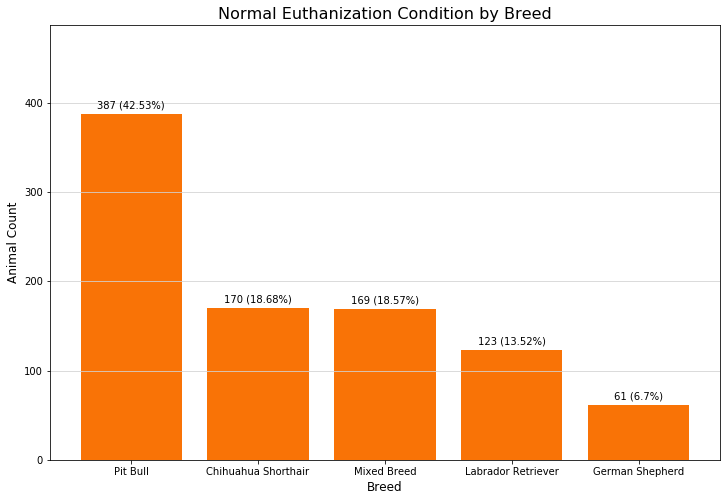

In [17]:
# get normal euthanasia outcome counts by breed
comb_dog_breed = dog_combined_nodup[(dog_combined_nodup['Animal Type'] == 'Dog')]
comb_dog_breed
comb_dog_breed['Outcome Type'].value_counts()
euth_outcomes_breed = comb_dog_breed[comb_dog_breed['Outcome Type']  == 'Euthanasia']['Dog Breed'].value_counts().head(i)

# let's plot
fig, ax = plt.subplots(figsize=(12,8))

x_axis = np.arange(len(euth_outcomes_breed))
# Create a bar chart based upon the above data
plt.bar(x_axis, euth_outcomes_breed, color=color[1])
# can just send in x axis since it has the vlaues of axis already to be updated
plt.xticks(x_axis, euth_outcomes_breed.index)

euth_total_outcomes_breed = euth_outcomes_breed.sum()

index = 0
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    pct = ' (' + str(round(h/euth_total_outcomes_breed * 100, 2)) + '%)'
    amt = format(p.get_height(), ',.0f')
#     print(amt + pct)
    if h != 0:   
        ax.annotate(amt+pct, xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    index += 1
        
# reset max y axis so we can get the values printed inside the chart
plt.ylim(0, max(euth_outcomes_breed.values)+100)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")

plt.title("Normal Euthanization Condition by Breed", fontsize='16')
plt.xlabel("Breed", fontsize='12')
plt.ylabel("Animal Count", fontsize='12')
plt.savefig('images/outcome_euth_breed.png')
plt.show()

#### Adoption Analysis

In [59]:
df_adoptions = df_combined_nodup[(df_combined_nodup['Animal Type'] == 'Dog')]

# Group mixed breeds.
df_adoptions['Dog Breed'] = df_adoptions['Breed'].apply(parse_breed)

# Remove "Mix" from breed description
stop_words = ["Mix"]
f = lambda x: ' '.join(w for w in x.split() if not w in stop_words)

df_adoptions['Dog Breed'] = df_adoptions['Dog Breed'].apply(f)

df_adoptions_ad = df_adoptions[(df_adoptions['Outcome Type'] == 'Adoption')]
adopt_breed = df_adoptions_ad['Dog Breed'].value_counts().head(i)
adopt_breed
      

      
      

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Mixed Breed            3619
Labrador Retriever     2407
Chihuahua Shorthair    2400
Pit Bull               1942
German Shepherd        1051
Name: Dog Breed, dtype: int64

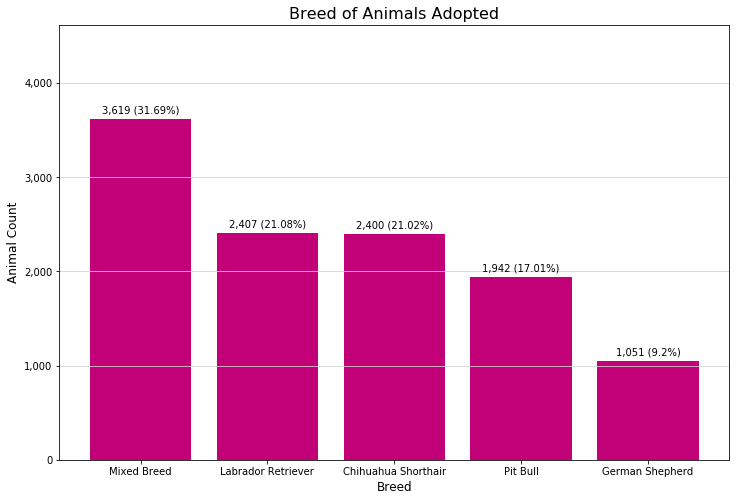

In [65]:
# let's plot
fig, ax = plt.subplots(figsize=(12,8))

x_axis = np.arange(len(adopt_breed))
# Create a bar chart based upon the above data
plt.bar(x_axis, adopt_breed, color=color[4])
# can just send in x axis since it has the vlaues of axis already to be updated
plt.xticks(x_axis, adopt_breed.index)

total_adopt_breed = adopt_breed.sum()

index = 0
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    pct = ' (' + str(round(h/total_adopt_breed * 100, 2)) + '%)'
    amt = format(p.get_height(), ',.0f')
#     print(amt + pct)
    if h != 0:   
        ax.annotate(amt+pct, xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    index += 1
        
# reset max y axis so we can get the values printed inside the chart
plt.ylim(0, max(adopt_breed.values)+1000)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")

plt.title("Breed of Animals Adopted", fontsize='16')
plt.xlabel("Breed", fontsize='12')
plt.ylabel("Animal Count", fontsize='12')
plt.savefig('images/dogs_adopted.png')
plt.show()

#### Dogs returned to the shelter more than once analysis

In [48]:
# Group mixed breeds.
df_dupes = aacdata.find_duplicate_animals(df_intake)
df_dupes = df_dupes.loc[(df_dupes['Animal Type'] == 'Dog')]
df_dupes['Dog Breed'] = df_dupes['Breed'].apply(parse_breed)

# Remove "Mix" from breed description
stop_words = ["Mix"]
f = lambda x: ' '.join(w for w in x.split() if not w in stop_words)

df_dupes['Dog Breed'] = df_dupes['Dog Breed'].apply(f)

# Find some basic descriptions of the data
df_dupes_count = df_dupes['Animal ID'].value_counts()
print(f"Total number of dogs returned: {len(df_dupes_count)}")
print(f"Average number of times a dog is returned: {round(df_dupes_count.mean(),2)-1}")
print(f"Maximum number of times a dog has been returned: {round(df_dupes_count.max(),2)}")

# sort returns based on breed
returned_dupes_breed = df_dupes['Dog Breed'].value_counts().head(i)
returned_dupes_breed

Total number of dogs returned: 6918
Average number of times a dog is returned: 1.35
Maximum number of times a dog has been returned: 31


Pit Bull               3131
Mixed Breed            2722
Labrador Retriever     1751
Chihuahua Shorthair    1203
German Shepherd         941
Name: Dog Breed, dtype: int64

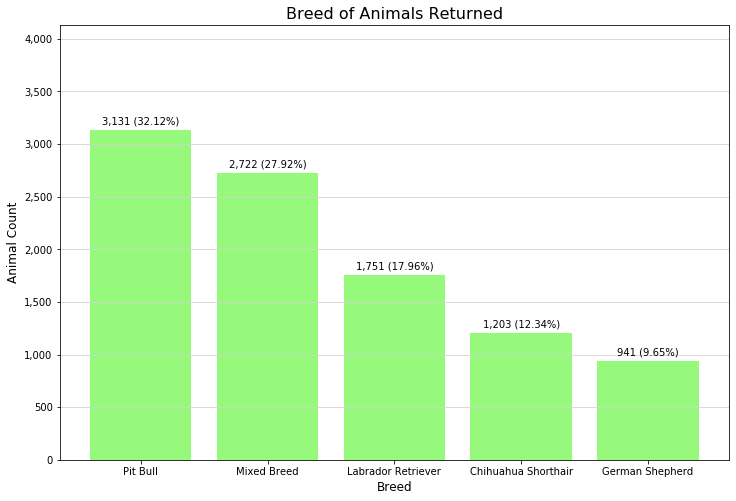

In [50]:
# let's plot
fig, ax = plt.subplots(figsize=(12,8))

x_axis = np.arange(len(returned_dupes_breed))
# Create a bar chart based upon the above data
plt.bar(x_axis, returned_dupes_breed, color=color[3])
# can just send in x axis since it has the vlaues of axis already to be updated
plt.xticks(x_axis, returned_dupes_breed.index)

total_returned_dupes_breed = returned_dupes_breed.sum()

index = 0
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    pct = ' (' + str(round(h/total_returned_dupes_breed * 100, 2)) + '%)'
    amt = format(p.get_height(), ',.0f')
#     print(amt + pct)
    if h != 0:   
        ax.annotate(amt+pct, xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    index += 1
        
# reset max y axis so we can get the values printed inside the chart
plt.ylim(0, max(returned_dupes_breed.values)+1000)
# format y axis with commas
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# show grid lines on y axis
ax.grid(b=True,which="both",axis="y",linestyle="-",color="lightgrey")

plt.title("Breed of Animals Returned", fontsize='16')
plt.xlabel("Breed", fontsize='12')
plt.ylabel("Animal Count", fontsize='12')
plt.savefig('images/dupes_by_breed.png')
plt.show()